# **Μέρος Α**


In [48]:
import random
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import copy
import timeit
import random
import matplotlib.pyplot as plt
import random
import scipy.spatial as sp

# # Step 1: Generate 120 points with integer coordinates
# #points = [(random.randint(-100, 100), random.randint(-100, 100)) for _ in range(120)]
# points= [
#     (49, 97), (53, 5), (33, 65), (62, 51), (100, 38),
#     (61, 45), (74, 27), (64, 17), (36, 17), (96, 12),
#     (79, 32), (68, 90), (77, 18), (39, 12), (93, 9),
#     (87, 42), (60, 71), (12, 45), (55, 40), (78, 81),
#     (26, 70), (61, 56), (66, 33), (7, 70), (1, 11),
#     (92, 51), (90, 100), (85, 80), (0, 78), (63, 42),
#     (31, 93), (41, 90), (8, 24), (72, 28), (30, 18),
#     (69, 57), (11, 10), (40, 65), (62, 13), (38, 70),
#     (37, 90), (15, 70), (42, 69), (26, 77), (70, 75),
#     (36, 56), (11, 76), (49, 40), (73, 30), (37, 23),
#     (24, 23), (4, 78), (84, 33), (60, 8), (11, 86),
#     (96, 16), (19, 4), (10, 89), (69, 87), (50, 90),
#     (67, 35), (66, 30), (27, 86), (75, 53), (74, 35),
#     (57, 63), (84, 82), (89, 45), (10, 41), (78, 14),
#     (62, 75), (80, 42), (24, 31), (2, 93), (34, 14),
#     (90, 28), (47, 21), (42, 54), (7, 12), (100, 18),
#     (89, 28), (5, 73), (81, 68), (77, 87), (9, 3),
#     (15, 81), (24, 77), (73, 15), (50, 11), (47, 14),
#     (4, 77), (2, 24), (23, 91), (15, 61), (26, 93),
#     (7, 86), (2, 69), (54, 79), (12, 33), (8, 28),
#     (9, 82), (38, 44), (55, 23), (7, 64), (59, 5),
#     (76, 12), (89, 50), (25, 33), (45, 93), (60, 72),
#     (21, 89), (86, 26), (98, 7), (100, 86), (20, 20),
#     (43, 67), (32, 15), (76, 56), (85, 22), (1, 60)
# ]

# # Step 2: Sort the points first by x, and if x is the same, by y
# sorted_points = sorted(points, key=lambda points: (points[0], points[1]))

# # Step 3: Print the sorted points
# # for point in sorted_points:
# #     print(point)
# def generate_unique_points(n_points, bounds=(0, 1), max_attempts=1000):
#     unique_points = set()
#     attempts = 0

#     while len(unique_points) < n_points and attempts < max_attempts:
#         # Generate a new random point
#         point = tuple(np.random.uniform(bounds[0], bounds[1], 2))
#         # Add the point to the set (sets automatically handle uniqueness)
#         unique_points.add(point)
#         attempts += 1

#     # Convert the set to a list of lists
#     return [list(point) for point in unique_points]

# # Number of points
# n_points = 120

# # Generate unique points within the range [0, 1] for both x and y
# points = generate_unique_points(n_points)


In [ ]:
def orientation(p, q, r):
    """
    Computes the orientation of three points using the determinant method.

    :param p: The first point (x1, y1)
    :param q: The second point (x2, y2)
    :param r: The third point (x3, y3)
    :return: A positive number if the orientation is counterclockwise, CCK
             a negative number if the orientation is clockwise,
             and 0 if the points are collinear.
    """
    # Coordinates of the points
    x1, y1 = p
    x2, y2 = q
    x3, y3 = r

    # Calculate the determinant
    determinant = x1 * (y2 - y3) - y1 * (x2 - x3) + (x2 * y3 - x3 * y2)
    if determinant > 0:
        return 1
    elif determinant < 0:
        return -1
    else:
        return 0


# **Incremaental Algorithm**

Vertices of the convex hull in clockwise order:


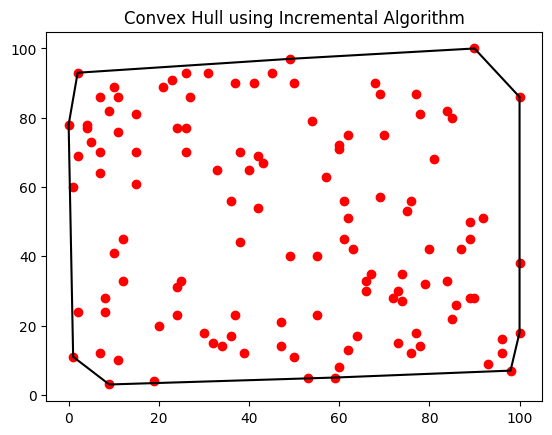

In [ ]:

upper_hull = []


def Incremental_Algorithm( points ):


        # Initialize with the first two points
        upper_hull.append(points[0])
        upper_hull.append(points[1])
        # Add the remaining points
        for p in points[2:]:
            upper_hull.append(p)
            # Steps 5-6: Remove points that create counterclockwise turns
            while len(upper_hull) > 2 and orientation(upper_hull[-3], upper_hull[-2], upper_hull[-1]) <= 0:
                upper_hull.pop(-2)  # Remove the middle of the last three points

        # Step 7: Construct the lower hull
        lower_hull = []

        # Initialize with the last two points
        lower_hull.append(points[-1])
        lower_hull.append(points[-2])

        # Add the remaining points in reverse order
        for p in reversed(points[:-2]):
            lower_hull.append(p)
            # Steps 10-11: Remove points that create counterclockwise turns
            while len(lower_hull) > 2 and orientation(lower_hull[-3], lower_hull[-2], lower_hull[-1]) <= 0:
                lower_hull.pop(-2)  # Remove the middle of the last three points

        # Step 12: Remove the first and last point from the lower hull
        lower_hull = lower_hull[1:-1]

        # Step 13: Append the lower hull to the upper hull
        convex_hull_points = upper_hull + lower_hull

        # Step 14: Return the convex hull
        return convex_hull_points

# Compute the convex hull
vertices = Incremental_Algorithm(sorted_points)

# Print the vertices of the convex hull
print("Vertices of the convex hull in clockwise order:")
# for p in hull:
#   print(p)

plt.scatter(list(zip(*sorted_points))[0], list(zip(*sorted_points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Incremental Algorithm");



# **Gift Wrapping Algorithm**

In [ ]:

def Gift_Wrapping(points):

    points.sort()                 # Sort the points in lexicographical order
    start_point = points[0]       # The first vertex start_point is selected as the leftmost point.
    hull_points = [points[0]]     # Update the hull_points list to include start_point
    remaining_points = points[:]  # Includes all points that are not yet in the hull

    while True:
        # current_point starts by being a random point that is not yet in the hull.
        # It receives its true value of the point with the maximum angle from start_point after the second loop.
        random_index = random.randrange(len(remaining_points))
        current_point = remaining_points[random_index]

        for candidate_point in remaining_points:

            if candidate_point != current_point:

                if orientation(start_point, current_point, candidate_point) == -1:              # if start_point, current_point and candidate_point define a CW orientation.
                    current_point = candidate_point

                elif orientation(start_point, current_point, candidate_point) == 0:             # if start_point, current_point and candidate_point are collinear and current_point is an internal point of start_point candidate_point.

                    dist_start_current = sp.distance.euclidean(start_point, current_point)
                    dist_current_candidate = sp.distance.euclidean(current_point, candidate_point)
                    dist_start_candidate = sp.distance.euclidean(start_point, candidate_point)

                    if dist_start_current + dist_current_candidate == dist_start_candidate:     # Internal point current_point of start_point candidate_point check.
                        current_point = candidate_point

        if current_point == points[0]: # Looping until the selected point current_point is equal to the initial leftmost point.
            break
        else: # If the stopping condition is false, we update start_point and the hull_points and remaining_points lists
            start_point = current_point
            hull_points.append(start_point)
            remaining_points.remove(start_point)

    return hull_points


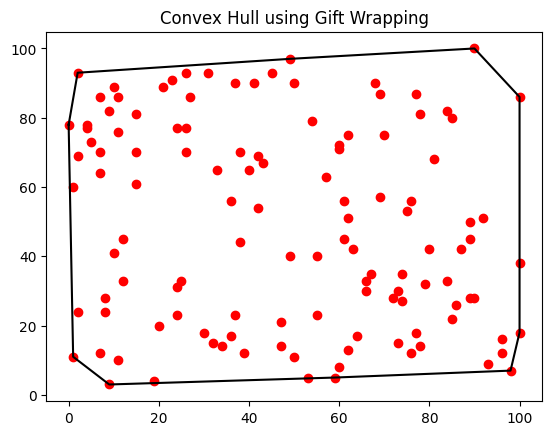

In [ ]:
vertices = Gift_Wrapping(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Gift Wrapping");

# **Divide and Conquer Algorithm**

In [ ]:
def find_upper_bridge(left_hull, right_hull):
    left_index = left_hull.index(max(left_hull))     # Rightmost point in the left hull
    right_index = right_hull.index(min(right_hull))  # Leftmost point in the right hull

    count = 0
    while count < 2:
        count = 0

        # Check orientation of the next left hull point relative to the current bridge
        next_left_index = (left_index + 1) % len(left_hull)
        orientation_result = orientation(right_hull[right_index], left_hull[left_index], left_hull[next_left_index])
        if orientation_result == -1:
            left_index = next_left_index
        else:
            count += 1

        # Check orientation of the next right hull point relative to the current bridge
        next_right_index = (right_index - 1) % len(right_hull)
        orientation_result = orientation(left_hull[left_index], right_hull[right_index], right_hull[next_right_index])
        if orientation_result == 1:
            right_index = next_right_index
        else:
            count += 1

    return left_index, right_index



In [ ]:
def find_lower_bridge(left_hull, right_hull):
    left_index = left_hull.index(max(left_hull))     # Rightmost point in the left hull
    right_index = right_hull.index(min(right_hull))  # Leftmost point in the right hull

    count = 0
    while count < 2:
        count = 0

        # Check orientation of the next right hull point relative to the current bridge
        next_right_index = (right_index + 1) % len(right_hull)
        orientation_result = orientation(left_hull[left_index], right_hull[right_index], right_hull[next_right_index])
        if orientation_result == -1:
            right_index = next_right_index
        else:
            count += 1

        # Check orientation of the next left hull point relative to the current bridge
        next_left_index = (left_index - 1) % len(left_hull)
        orientation_result = orientation(right_hull[right_index], left_hull[left_index], left_hull[next_left_index])
        if orientation_result == 1:
            left_index = next_left_index
        else:
            count += 1

    return left_index, right_index


In [ ]:
def merge(left_hull, right_hull):
    merged_vertices = []

    upper_left_index, upper_right_index = find_upper_bridge(left_hull, right_hull)
    lower_left_index, lower_right_index = find_lower_bridge(left_hull, right_hull)

    # Collect points from the left hull from the upper to the lower bridge
    i = upper_left_index
    while i != lower_left_index:
        merged_vertices.append(left_hull[i])
        i = (i + 1) % len(left_hull)
    merged_vertices.append(left_hull[lower_left_index])

    # Collect points from the right hull from the lower to the upper bridge
    i = lower_right_index
    while i != upper_right_index:
        merged_vertices.append(right_hull[i])
        i = (i + 1) % len(right_hull)
    merged_vertices.append(right_hull[upper_right_index])

    return merged_vertices


In [ ]:
def divide_and_conquer(points):
    points.sort()
    if len(points) <= 3:
        # Base case: directly return sorted points
        sorted_points = points[:]
        if len(sorted_points) == 3:
            if orientation(sorted_points[0], sorted_points[1], sorted_points[2]) == 1:
                sorted_points.reverse()
        return sorted_points


    mid = math.ceil(len(points) / 2)
    left_half = points[:mid]
    right_half = points[mid:]

    left_hull = divide_and_conquer(left_half)
    right_hull = divide_and_conquer(right_half)

    return merge(left_hull, right_hull)


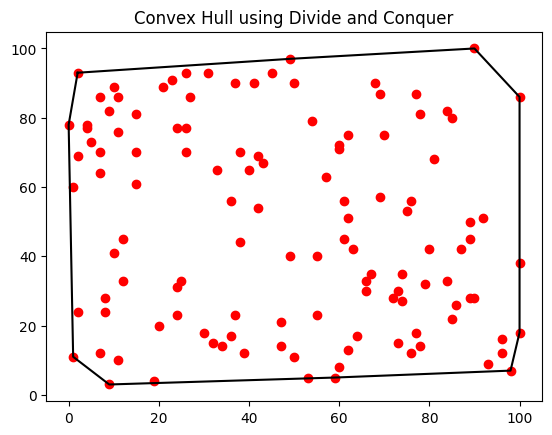

In [ ]:
vertices = divide_and_conquer(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Divide and Conquer");

# **QuickHull Algorithm**

In [ ]:
# import random
# import matplotlib.pyplot as plt

# # Συνάρτηση για την απόσταση ενός σημείου από μια ευθεία


# # def line_distance(point, line_start, line_end):

# #     x0, y0 = point
# #     x1, y1 = line_start
# #     x2, y2 = line_end

# #     # Special case: Line segment is vertical
# #     if x2 - x1 == 0:
# #         return abs(x0 - x1)

# #     # Special case: Line segment is degenerate (start and end points are the same)
# #     if x1 == x2 and y1 == y2:
# #         raise ValueError("The line segment is degenerate: start and end points are the same.")

# #     # Calculate the numerator and denominator for the perpendicular distance formula
# #     numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
# #     denominator = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

# #     # Calculate and return the distance, rounded up
# #     distance = numerator / denominator
# #     return distance

# def line_distance(point_1, point_2, point_p):
#     # We first handle the case of a vertical line.
#     if point_2[0] - point_1[0] == 0:
#         distance = abs(point_p[0] - point_1[0])
#         return distance

#     # Coefficients of the line equation Ax + By + C = 0
#     A = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
#     B = -1
#     C = point_1[1] - A * point_1[0]

#     # Calculate distance between the line defined above and point p.
#     distance = abs(A * point_p[0] + B * point_p[1] + C) / np.sqrt(A**2 + B**2)

#     return distance

# # Συνάρτηση για την αναδρομική εύρεση του κυρτού περιβλήματος
# def quickhull(points_S, line_start_A, line_end_B):
#     # print(len(points_S))
#     # if not points_S:  # Base case: no points left
#     #   return [line_start_A, line_end_B]

#     if len(points_S) <= 2:

#        return [line_start_A, line_end_B]

#     # Βρίσκουμε το πιο απομακρυσμένο σημείο από την ευθεία
#     max_distance = -1
#     farthest_point = None
#     for point in points_S:
#         distance = line_distance(line_start_A, line_end_B,point)
#         if distance > max_distance:
#             max_distance = distance
#             farthest_point = point


#     if farthest_point is None:
#         return [line_start_A, line_end_B]

#     First_set = []
#     for p in points_S:

#       if orientation(line_start_A, farthest_point, p) <= 0:
#         First_set.append(p)

#     Second_set = []
#     for p in points_S:
#       if orientation(farthest_point, line_end_B, p) <= 0:
#         Second_set.append(p)


#     return quickhull(First_set, line_start_A, farthest_point) + quickhull(Second_set, farthest_point, line_end_B)






# def Quick_hull(points):
#     points_set = set(tuple(p) for p in points)
#     points = list(points_set)

#     # Βρίσκουμε τα ακραία σημεία
#     min_x = min(points, key=lambda p: p[0])
#     max_x = max(points, key=lambda p: p[0])
#     min_y = min(points, key=lambda p: p[1])
#     max_y = max(points, key=lambda p: p[1])

#     Upperlist = []
#     Bottomlist = []
#     Rightlist =[]
#     Leftlist = []
#     Upper_hull = []
#     Bottom_hull = []
#     Right_hull =[]
#     Left_hull = []

#     for point in points:

#       if orientation(min_y, max_x, point) <= 0:
#           Rightlist.append(point)

#       if  orientation(max_y, max_x, point) <= 0:
#           Upperlist.append(point)

#       if orientation(min_y, min_x, point) <= 0:
#           Bottomlist.append(point)

#       if orientation(min_x, max_y, point) <= 0:
#           Leftlist.append(point)
#     # Δημιουργούμε τις 4 πλευρές του κυρτού περιβλήματος
#     hull = []

#     Right_hull = quickhull(Rightlist, max_x, min_y)
#     # print("VICTORTYYYYYYYYYY///////////////////////////////////////////////////////")
#     Upper_hull = quickhull(Upperlist, max_y, max_x)
#     # print("VICTORTYYYYYYYYYY///////////////////////////////////////////////////////")
#     Bottom_hull = quickhull(Bottomlist, min_y, min_x)
#     # print("VICTORTYYYYYYYYYY///////////////////////////////////////////////////////")
#     Left_hull = quickhull(Leftlist, min_x, max_y)



#     return Right_hull + Upper_hull + Bottom_hull + Left_hull








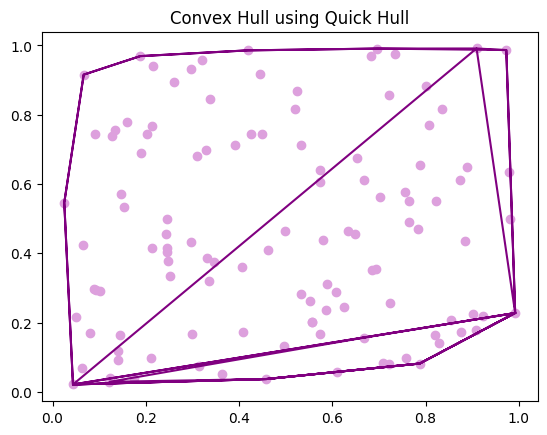

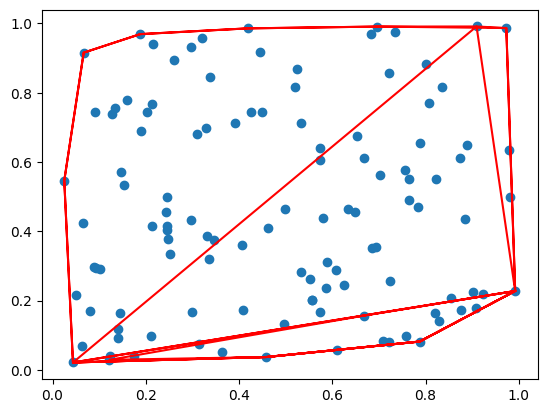

In [ ]:
vertices = Quick_hull(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'plum')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'purple')
plt.title("Convex Hull using Quick Hull");


def plot_hull(points, hull):
    plt.figure()
    xs, ys = zip(*points)
    plt.scatter(xs, ys)
    hull_xs, hull_ys = zip(*hull + [hull[0]])  # Close the loop
    plt.plot(hull_xs, hull_ys, 'r-')
    plt.show()
plot_hull(points,vertices)

[(0.9987789586652032, 0.30548003949028946), (0.7636741029870887, 0.0012641906949090176), (0.7636741029870887, 0.0012641906949090176), (0.8179162726255996, 0.011936947379351026), (0.8179162726255996, 0.011936947379351026), (0.9937903756070358, 0.08262101658060561), (0.9937903756070358, 0.08262101658060561), (0.9987789586652032, 0.30548003949028946), (0.9987789586652032, 0.30548003949028946), (0.7636741029870887, 0.0012641906949090176), (0.18915108198719988, 0.9949282105628058), (0.09025250251628147, 0.939991292369877), (0.09025250251628147, 0.939991292369877), (0.05309067023936809, 0.8708225366130783), (0.05309067023936809, 0.8708225366130783), (0.002302291494289177, 0.6852572940364613), (0.002302291494289177, 0.6852572940364613), (0.009201068658184153, 0.2806600333092012), (0.009201068658184153, 0.2806600333092012), (0.040393875452598316, 0.003690281630847503), (0.040393875452598316, 0.003690281630847503), (0.7636741029870887, 0.0012641906949090176), (0.7636741029870887, 0.001264190694

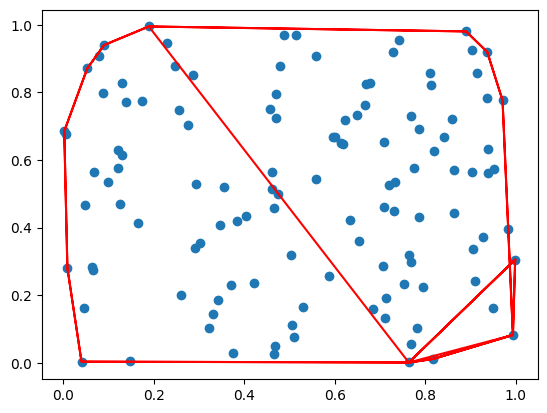

In [ ]:
import random
import matplotlib.pyplot as plt

def orientation(p, q, r):
    """
    Computes the orientation of three points using the determinant method.

    :param p: The first point (x1, y1)
    :param q: The second point (x2, y2)
    :param r: The third point (x3, y3)
    :return: A positive number if the orientation is counterclockwise (CCK),
             a negative number if the orientation is clockwise,
             and 0 if the points are collinear.
    """
    x1, y1 = p
    x2, y2 = q
    x3, y3 = r

    # Calculate the determinant
    determinant = x1 * (y2 - y3) - y1 * (x2 - x3) + (x2 * y3 - x3 * y2)
    return determinant
def line_distance(point_1, point_2, point_p):
    # We first handle the case of a vertical line.
    if point_2[0] - point_1[0] == 0:
        distance = abs(point_p[0] - point_1[0])
        return distance

    # Coefficients of the line equation Ax + By + C = 0
    A = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
    B = -1
    C = point_1[1] - A * point_1[0]

    # Calculate distance between the line defined above and point p.
    distance = abs(A * point_p[0] + B * point_p[1] + C) / np.sqrt(A**2 + B**2)

    return distance

def quickhull(points_S, line_start_A, line_end_B):
    # # Remove points that are very close to the line
    # points_S = [p for p in points_S if line_distance(line_start_A, line_end_B, p) > epsilon]

    # Base case: no points left or only two points
    if len(points_S) <= 2:
        return [line_start_A, line_end_B]

    # Find the farthest point from the line
    max_distance = -1
    farthest_point = None
    for point in points_S:
        distance = line_distance(line_start_A, line_end_B, point)
        if distance > max_distance:
            max_distance = distance
            farthest_point = point

    # If no farthest point is found, return the initial line
    if farthest_point is None:
        return [line_start_A, line_end_B]

    # Divide the points into two sets based on orientation
    First_set = [p for p in points_S if orientation(line_start_A, farthest_point, p) <= 0]
    Second_set = [p for p in points_S if orientation(farthest_point, line_end_B, p) <= 0]

    # Recursively find the convex hull for each set
    return quickhull(First_set, line_start_A, farthest_point) + quickhull(Second_set, farthest_point, line_end_B)

def Quick_hull(points):
    # Convert the list of points to a set to remove duplicates
    points_set = set(tuple(p) for p in points)
    points = list(points_set)

    # Find the leftmost and rightmost points
    min_x = min(points, key=lambda p: p[0])
    max_x = max(points, key=lambda p: p[0])

    # Find the topmost and bottommost points
    min_y = min(points, key=lambda p: p[1])
    max_y = max(points, key=lambda p: p[1])

    # Divide the points into four sets based on orientation
    Upperlist = [p for p in points if orientation(max_y, max_x, p) <= 0]
    Bottomlist = [p for p in points if orientation(min_y, min_x, p) <= 0]
    Rightlist = [p for p in points if orientation(min_y, max_x, p) <= 0]
    Leftlist = [p for p in points if orientation(min_x, max_y, p) <= 0]

    # Recursively find the convex hull for each set
    Upper_hull = quickhull(Upperlist, max_y, max_x)
    Bottom_hull = quickhull(Bottomlist, min_y, min_x)
    Right_hull = quickhull(Rightlist, max_x, min_y)
    Left_hull = quickhull(Leftlist, min_x, max_y)

    # Combine the hulls
    return Right_hull + Upper_hull + Bottom_hull + Left_hull

# Example usage
# points = [(1, 1), (2, 3), (4, 2), (5, 4), (3, 5), (2, 4)]
hull = Quick_hull(points)
print(hull)

# Visualize the points and the convex hull
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.plot([p[0] for p in hull], [p[1] for p in hull], 'r-')
plt.show()

In [ ]:
# # !pip install scipy
# import scipy.linalg
# import numpy as np
# def Objective_Function(variables_x):
#   Result = 5 * variables_x[0] + 12 * variables_x[1]
#   return Result

# def restriction(flag, x1, x2, a1, a2 , b):
#    if flag == 1:
#     result = a1*x1 + a2*x2
#     if(result > b):
#       return 1
#     else:
#       return 0



# def Incremental_Linear_Porgramming(An, Bn, Ris):

#   vertices = []
#   Vertex1 = scipy.linalg.solve(An[:2], Bn[:2])
#   vertices.append(Vertex1)
#   Vertex2 = scipy.linalg.solve(An[1:3], Bn[1:3])
#   vertices.append(Vertex2)
#   Vertex3 = scipy.linalg.solve(np.vstack([An[0], An[3]]), np.vstack([Bn[0],Bn[3]]))
#   vertices.append(Vertex3)
#   max_f = Objective_Function(vertices[0])

#   solution =[]
#   for i in vertices:
#      if(Objective_Function(i) > max_f):
#         max_f = Objective_Function(i)
#         solution = i
#   print(solution)
#   print(max_f)

#   i=4

#   for row in An:

#     flag = Ris[i]
#     if(restriction(flag, row[0], row[1], solution[0], solution[1], Bn[4]) != flag):

#     else:
#         continue

#   return vertices

In [ ]:
# Bn = np.array([5, -3, 2, 35, 32, 26 ])
# Ris = [0 , 1 , 1, 0, 0, 0]
# An = np.array([
#     [1, 3],
#     [-1, 1],
#     [7, -3],
#     [4, -9],
#     [3, -7],
#     [-2, 5]])
# N = 2
# result = Incremental_Linear_Porgramming(An, Bn, Ris)

# print(result)

[[ 7.14285714]
 [-0.71428571]]
[27.14285714]
hello
hello
hello
hello
hello
hello
[array([3.5, 0.5]), array([-1.75, -4.75]), array([[ 7.14285714],
       [-0.71428571]])]


In [ ]:
import scipy.linalg
import numpy as np

# Objective function to maximize
def objective_function(variables_x):
    result = (-3)* variables_x[0] + 12 * variables_x[1]
    return result

# Function to check if a point satisfies a constraint
# flag == 1 means constraint is >=, flag == 0 means constraint is <=
def check_constraint(flag, x1, x2, a1, a2, b):
    result = a1 * x1 + a2 * x2
    if  (result >= b and flag == 1) or (result <= b and flag == 0):  # >= constraint
        return flag
    else:
      return -1

# Main function to perform Incremental Linear Programming
def incremental_linear_programming(A, b, constraint_types):
    vertices = []

    # Initialize with three vertices formed by the first three constraints
    vertex1 = scipy.linalg.solve(A[:2], b[:2])
    vertices.append(vertex1)
    vertex2 = scipy.linalg.solve(A[1:3], b[1:3])
    vertices.append(vertex2)
    vertex3 = scipy.linalg.solve(np.vstack([A[0], A[3]]), np.vstack([b[0], b[3]]))
    vertices.append(vertex3)

    # Find the vertex that maximizes the objective function
    max_value = objective_function(vertices[0])
    solution = vertices[0]
    for vertex in vertices[1:]:
        value = objective_function(vertex)
        if value > max_value:
            max_value = value
            solution = vertex

    # print("Initial solution:", solution)
    # print("Initial max value:", max_value)
    # print(len(A))
    # Start evaluating additional constraints
    for i in range(3, len(A)):

        # Check if the current solution satisfies the next constraint
        if  check_constraint(constraint_types[i], solution[0], solution[1], A[i][0], A[i][1], b[i]) != constraint_types[i]:
            # If not, find a new solution that satisfies this constraint
            # Convert the problem to a 1D problem by eliminating one variable
            # Solving for x1 as a function of x2 using the new constraint equation
            x1_function = lambda x2: (b[i] - A[i][1] * x2) / A[i][0]

            # Transform the previous constraints into a smaller problem in terms of x2
            small_constraints = []
            small_constants = []
            for j in range(i):
                small_constraint = - (A[i][1] / A[i][0]) * A[j][0] + A[j][1]
                small_constant = - (b[i] / A[i][0]) * A[j][0] + b[j]
                small_constraints.append(small_constraint)
                small_constants.append(small_constant)

            # Create a small objective function in terms of x2
            small_objective_function = lambda x2: objective_function([x1_function(x2), x2])

            # Solve the smaller problem to find the best x2
            new_x2 = small_linear_programming_algorithm(small_objective_function, small_constraints, small_constants,constraint_types)

            # If no valid solution is found, the problem is infeasible
            if new_x2 is None:
                print("The problem is infeasible with the given constraints.")
                return None

            # Update the solution with the new x1 and x2 values
            new_x1 = x1_function(new_x2)
            solution = [new_x1, new_x2]
            max_value = objective_function(solution)
            print("Updated solution:", solution)
            print("Updated max value:", max_value)

    return solution

# Helper function to solve the smaller 1D linear programming problem
# Helper function to solve the smaller 1D linear programming problem
def small_linear_programming_algorithm(small_objective_function, coefficients, constants, constraint_types):
    leq_res = []
    geq_res = []

    for coefficient, constant, flag in zip(coefficients, constants, constraint_types):
        # Assuming x1 = 0 in 1D case, we check the constraint for x2 (i.e., candidate_solution)
        # If coefficient >= 0, it's a lower bound constraint, otherwise it's an upper bound constraint
        # Check the constraint to see if it fits in the >= category
        if check_constraint(flag, 0, constant / coefficient, 0, coefficient, constant) == flag:
            geq_res.append(constant / coefficient)
        else:
            # Check the constraint to see if it fits in the <= category
            if check_constraint(flag, 0, constant / coefficient, 0, coefficient, constant) == flag:
                leq_res.append(constant / coefficient)

    # Initialize result as None to handle infeasibility
    result = None

    # Find candidate solution
    if len(geq_res) == 0:
        candidate_solution = min(leq_res)
    elif len(leq_res) == 0:
        candidate_solution = max(geq_res)
    else:
        lower_bound = min(leq_res)
        upper_bound = max(geq_res)

        # Compare objective values at the bounds
        if small_objective_function(lower_bound) > small_objective_function(upper_bound):
            candidate_solution = lower_bound
        else:
            candidate_solution = upper_bound

    # Now, check if the candidate solution satisfies all constraints
    is_feasible = True
    for coefficient, constant, flag in zip(coefficients, constants, constraint_types):
        # Check if the candidate solution satisfies the constraint
        if not check_constraint(flag, 0, candidate_solution, 0, coefficient, constant) == flag:
            is_feasible = False
            break

    if is_feasible:
        result = candidate_solution
    else:
        print("Candidate solution does not satisfy the constraints.")

    return result



An = np.array([[1, 3], [-1, 1], [7, -3], [4,-9], [3, -7], [-2, 5],[1,0], [0, 1]])
Bn = np.array([5, -3, 1, 35, 32, 26, 0, 0])
Ris = [0, 1, 1, 0, 0, 0, 1, 1]
result = incremental_linear_programming(An, Bn, Ris)
print("The feasible solution is:", result)

The feasible solution is: [3.5 0.5]


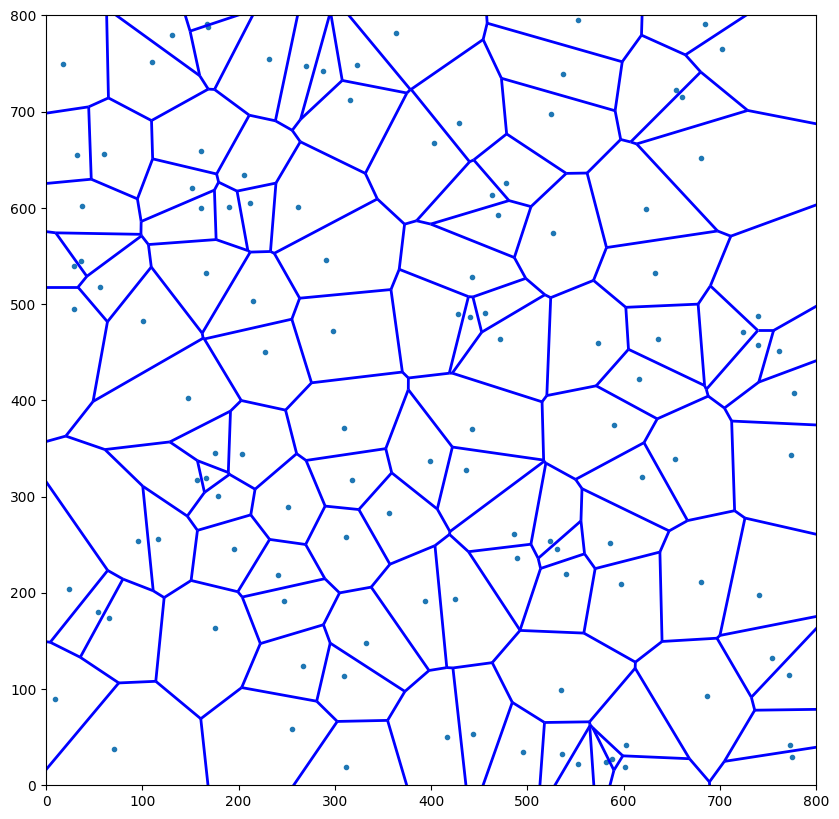

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import random

SIZE = 800  # Increase the canvas size
POINTS = 120

# Create a list of random points
random.seed(40)
points = [[random.randrange(SIZE), random.randrange(SIZE)]
          for i in range(POINTS)]
points.append((-SIZE*3, -SIZE*3))
points.append((-SIZE*3, SIZE*4))
points.append((SIZE*4, -SIZE*3))
points.append((SIZE*4, SIZE*4))

# Compute Voronoi diagram
voronoi = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size
voronoi_plot_2d(voronoi, ax=ax, show_vertices=False, line_colors='blue', line_width=2)

# Set plot limits and aspect ratio
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
ax.set_aspect('equal')

plt.show()



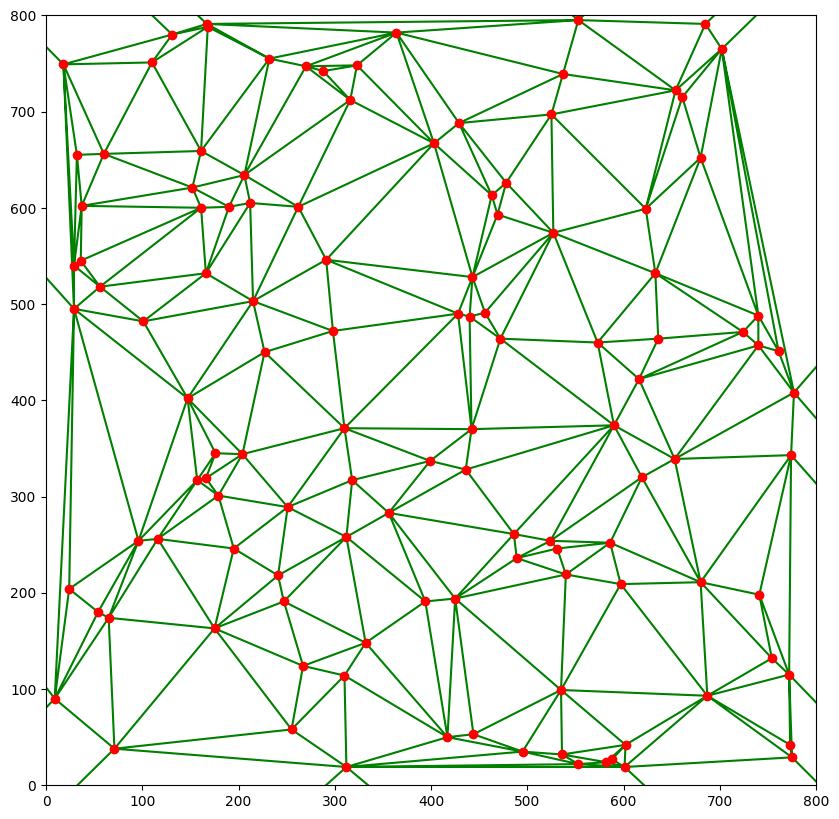

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import random



# Create a list of random points
random.seed(40)
points = [[random.randrange(SIZE), random.randrange(SIZE)]
          for i in range(POINTS)]
points.append((-SIZE*3, -SIZE*3))
points.append((-SIZE*3, SIZE*4))
points.append((SIZE*4, -SIZE*3))
points.append((SIZE*4, SIZE*4))

# Compute Delaunay triangulation
delaunay = Delaunay(points)

# Plot Delaunay triangulation
fig, ax = plt.subplots(figsize=(10, 10))
ax.triplot([p[0] for p in points], [p[1] for p in points], delaunay.simplices, color='green')

# Plot the points as well
ax.plot([p[0] for p in points], [p[1] for p in points], 'o', color='red')

# Set plot limits and aspect ratio
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
ax.set_aspect('equal')

plt.show()


In [37]:
def build_graph_from_tree(node, graph=None, pos=None, level=0, x=0, dx=1.0):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {}

    if node is not None:
        # Add node to the graph
        graph.add_node(node.point, label=f"({node.point[0]}, {node.point[1]})")

        # Set position for the node
        pos[node.point] = (x, -level)

        # Calculate the new x position for the children
        dx /= 2
        next_x = x - dx

        if node.left is not None:
            graph.add_edge(node.point, node.left.point)
            build_graph_from_tree(node.left, graph, pos, level + 1, next_x, dx)
            next_x += dx * 2  # Move to the next x position for the right child

        if node.right is not None:
            graph.add_edge(node.point, node.right.point)
            build_graph_from_tree(node.right, graph, pos, level + 1, next_x, dx)

    return graph, pos

def draw_tree(node):
    graph, pos = build_graph_from_tree(node)

    # Draw the tree using networkx and matplotlib
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels=nx.get_node_attributes(graph, 'label'), node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("2D Range Tree Visualization")
    plt.show()





The range x-tree 


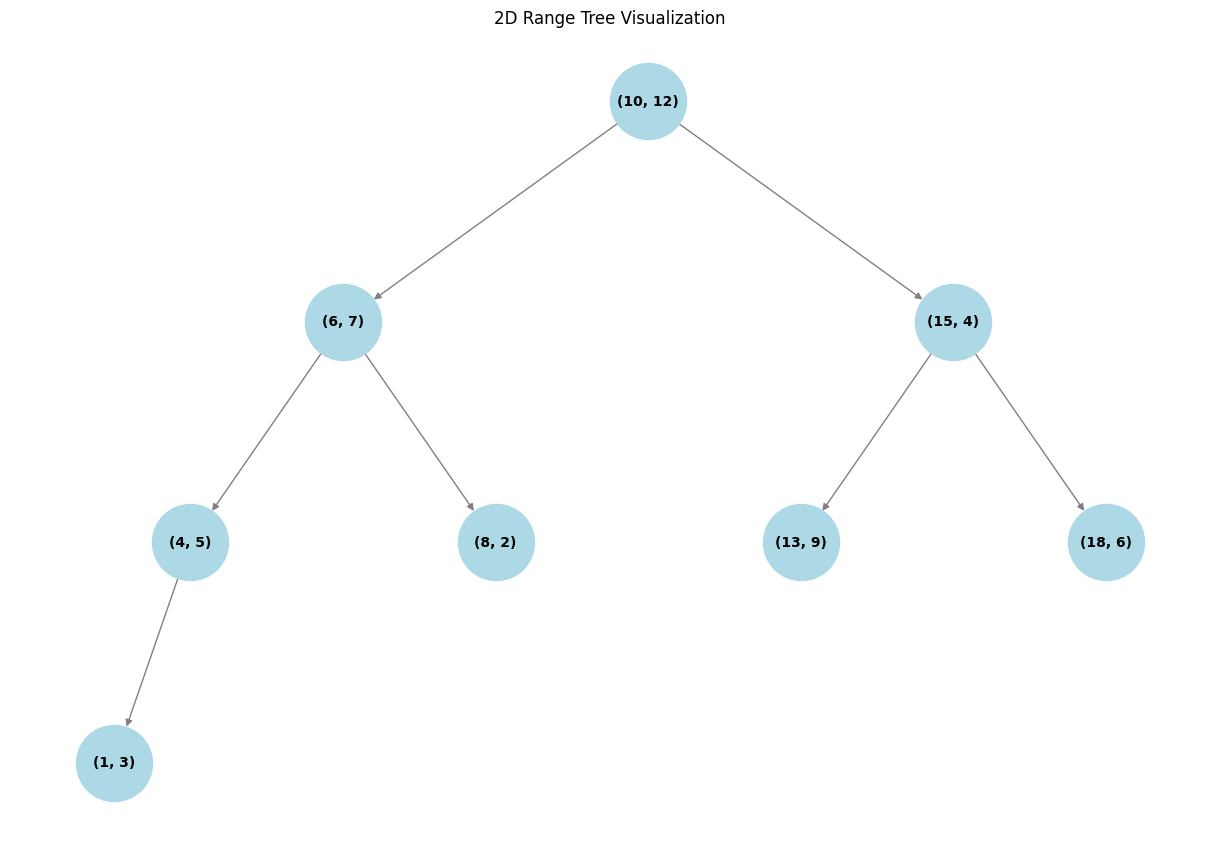

In [59]:

import matplotlib.pyplot as plt
import networkx as nx

class RangeTree2D:
    def __init__(self, points):
        self.points = points
        self.root = self.build_primary_tree(points)
        self.build_secondary_trees(self.root, points)

    class Node:
        def __init__(self, point, left=None, right=None, secondary_tree=None):
            self.point = point  # (x, y)
            self.left = left    # Left child in the primary tree
            self.right = right  # Right child in the primary tree
            self.secondary_tree = secondary_tree  # Secondary tree (BST on y-coordinates)

    def build_primary_tree(self, points):
        if not points:
            return None
        points.sort(key=lambda p: p[0])
        median_index = len(points) // 2
        median_point = points[median_index]

        left_subtree = self.build_primary_tree(points[:median_index])
        right_subtree = self.build_primary_tree(points[median_index + 1:])
        # print("Next Step")
        # draw_tree(self.Node(median_point, left_subtree, right_subtree))
        return self.Node(median_point, left_subtree, right_subtree)

    def build_secondary_tree(self, points):
        if not points:
            return None
        points.sort(key=lambda p: p[1])
        median_index = len(points) // 2
        median_point = points[median_index]
        left_subtree = self.build_secondary_tree(points[:median_index])
        right_subtree = self.build_secondary_tree(points[median_index + 1:])
        return self.Node(median_point, left_subtree, right_subtree)

    def build_secondary_trees(self, node, all_points):
        if node is None:
            return
        subtree_points = self.collect_subtree_points(node, all_points)
        node.secondary_tree = self.build_secondary_tree(subtree_points)
        self.build_secondary_trees(node.left, all_points)
        self.build_secondary_trees(node.right, all_points)

    def collect_subtree_points(self, node, all_points):
        if node is None:
            return []
        return [point for point in all_points if self.is_point_in_subtree(node, point)]

    def is_point_in_subtree(self, node, point):
        if node is None:
            return False
        x, y = point
        node_x, node_y = node.point
        if x < node_x:
            return self.is_point_in_subtree(node.left, point)
        elif x > node_x:
            return self.is_point_in_subtree(node.right, point)
        else:
            return True


    def range_search(self, node, xmin, xmax, ymin, ymax):
        if node is None:
            return []

        # Use a set to avoid duplicates
        points_in_range = set()

        # 1. Check if the current node's point is in the x-range
        x, y = node.point
        if xmin <= x <= xmax:
            # Perform y-range search on the secondary tree and update the set
            points_in_range.update(self.secondary_range_search(node.secondary_tree, xmin, xmax, ymin, ymax))


        # 3. Recursively search the left and right subtrees
        # If there might be points in the left subtree
        if xmin <= x:
            points_in_range.update(self.range_search(node.left, xmin, xmax, ymin, ymax))

        # If there might be points in the right subtree
        if x <= xmax:
            points_in_range.update(self.range_search(node.right, xmin, xmax, ymin, ymax))

        return list(points_in_range)


    def secondary_range_search(self, node, xmin, xmax, ymin, ymax):
        if node is None:
            return set()

        # Use a set to collect valid points in the y-range
        points_in_y_range = set()

        # Current point in the secondary tree (x, y)
        x, y = node.point

        # 1. Check if the x-coordinate of the current point is within the x-range
        if xmin <= x <= xmax:
            # 2. If the y-coordinate is within the y-range, include it
            if ymin <= y <= ymax:
                points_in_y_range.add(node.point)

        # 3. Recursively check the left subtree (y must be >= ymin)
        if ymin <= y:
            points_in_y_range.update(self.secondary_range_search(node.left, xmin, xmax, ymin, ymax))

        # 4. Recursively check the right subtree (y must be <= ymax)
        if y <= ymax:
            points_in_y_range.update(self.secondary_range_search(node.right, xmin, xmax, ymin, ymax))

        return points_in_y_range



# Example: Building and visualizing a 2D Range Tree
points = [(1, 3), (4, 5), (6, 7), (8, 2), (10, 12), (13, 9), (15, 4), (18, 6)]

# Build and visualize the tree
range_tree = RangeTree2D(points)
print("The range x-tree ")
draw_tree(range_tree.root)
# draw_tree(range_tree.root.secondary_tree)
# print("-> The secondary range trees.")
# def visualizer(node):

#   if node.left is not None:
#     draw_tree(node.left.secondary_tree)
#     visualizer(node.left)
#   if node.right is not None:
#     draw_tree(node.right.secondary_tree)
#     visualizer(node.right)

# visualizer(range_tree.root)

# points_in_range = range_tree.range_search(range_tree.root, xmin=4, xmax=15, ymin=3, ymax=9)
# print(points_in_range)





-> The secondary range trees.


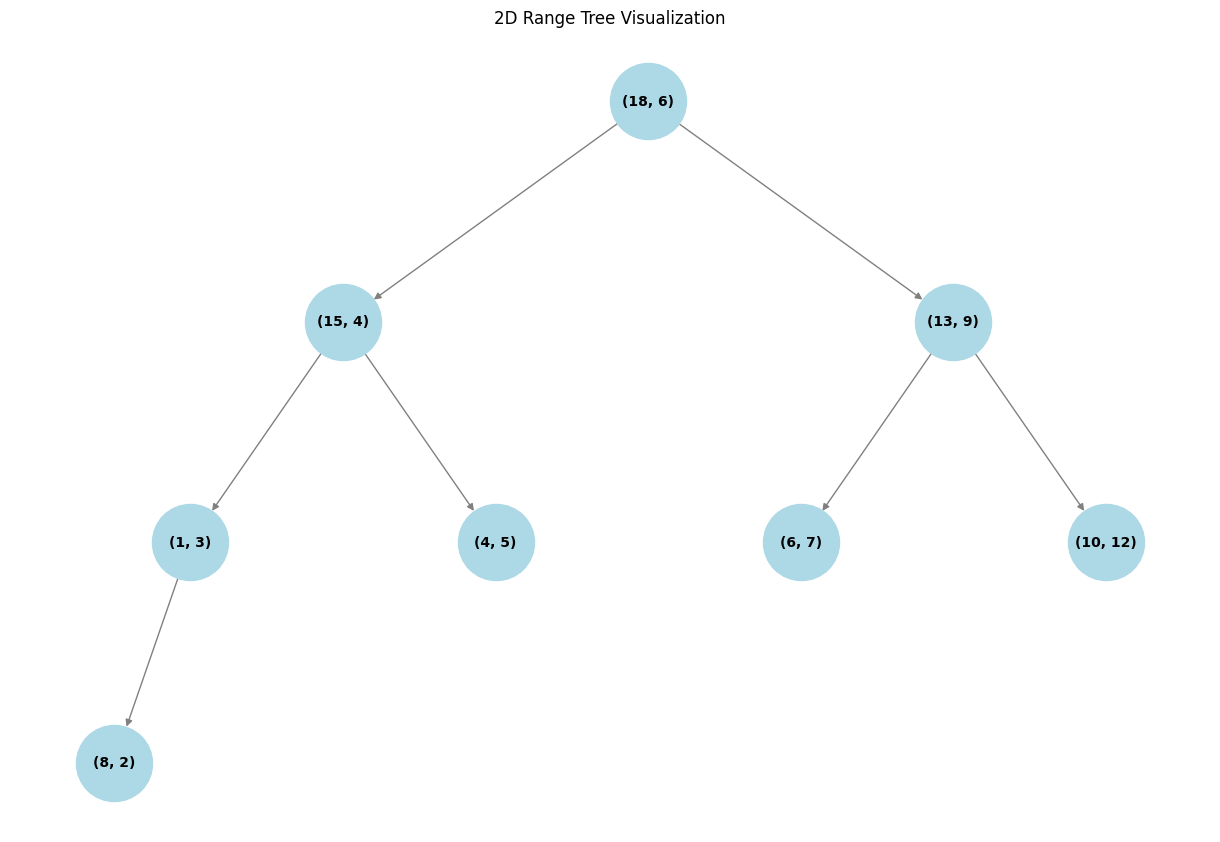

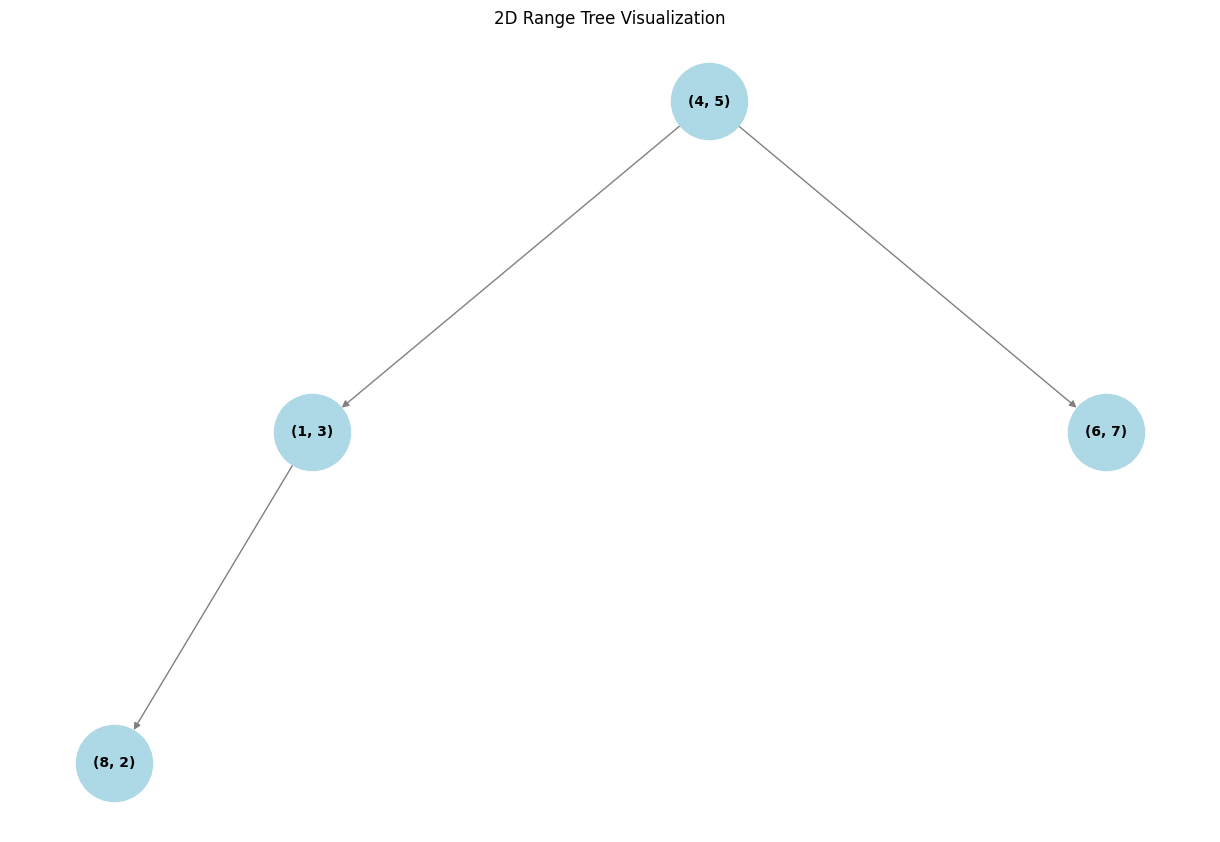

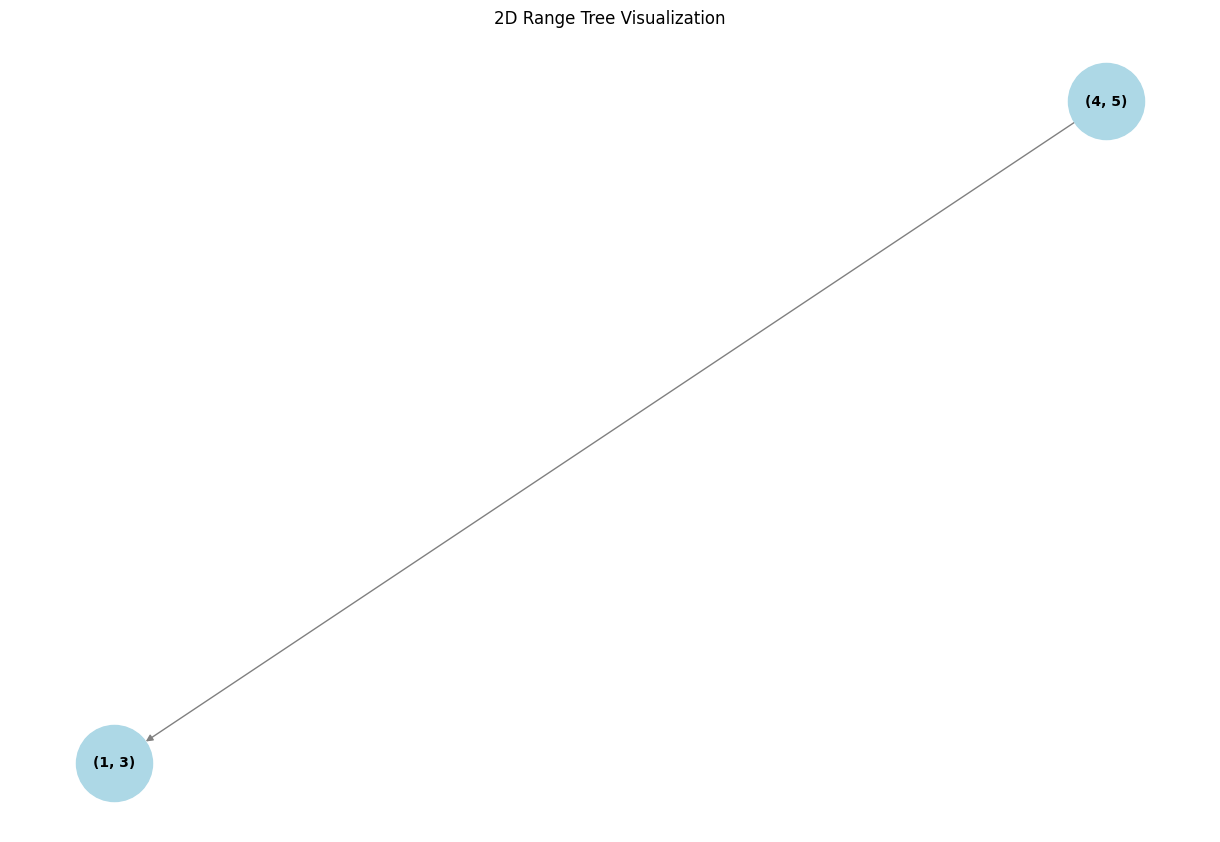

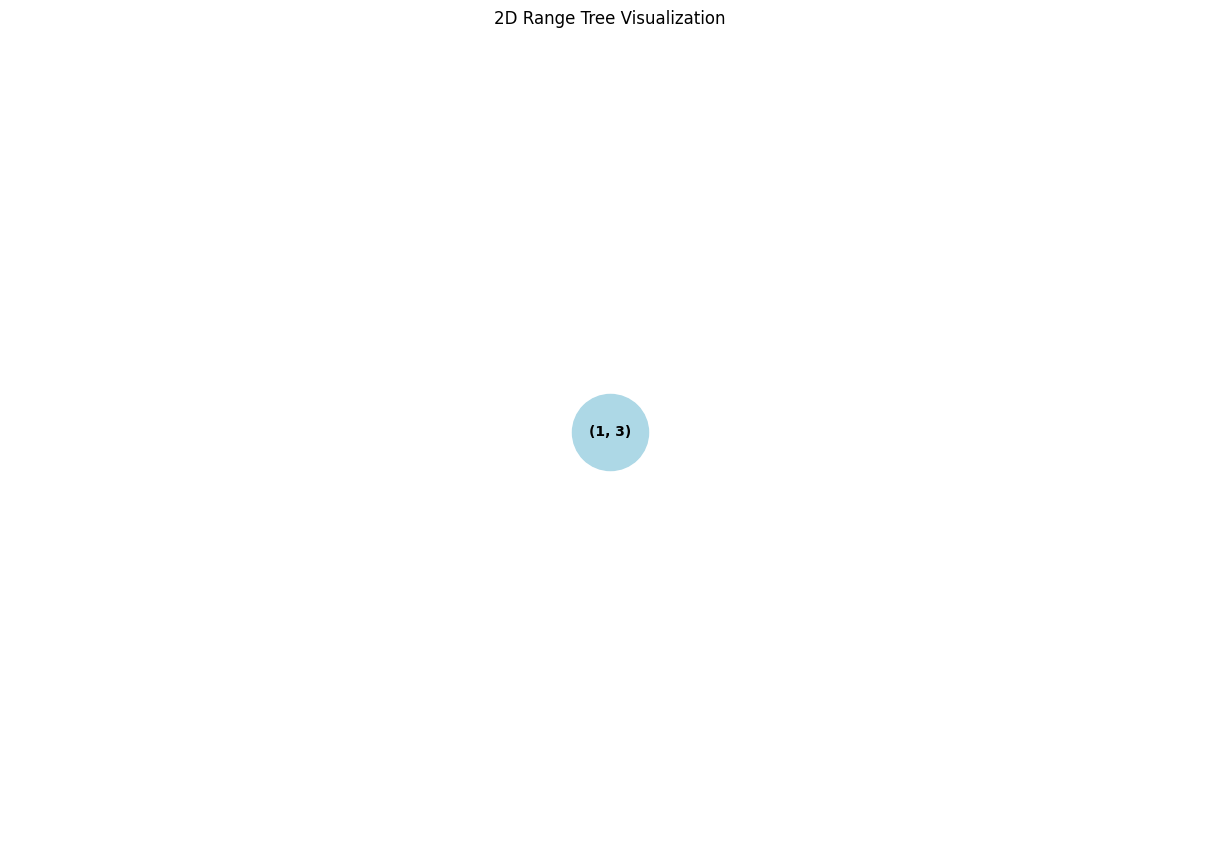

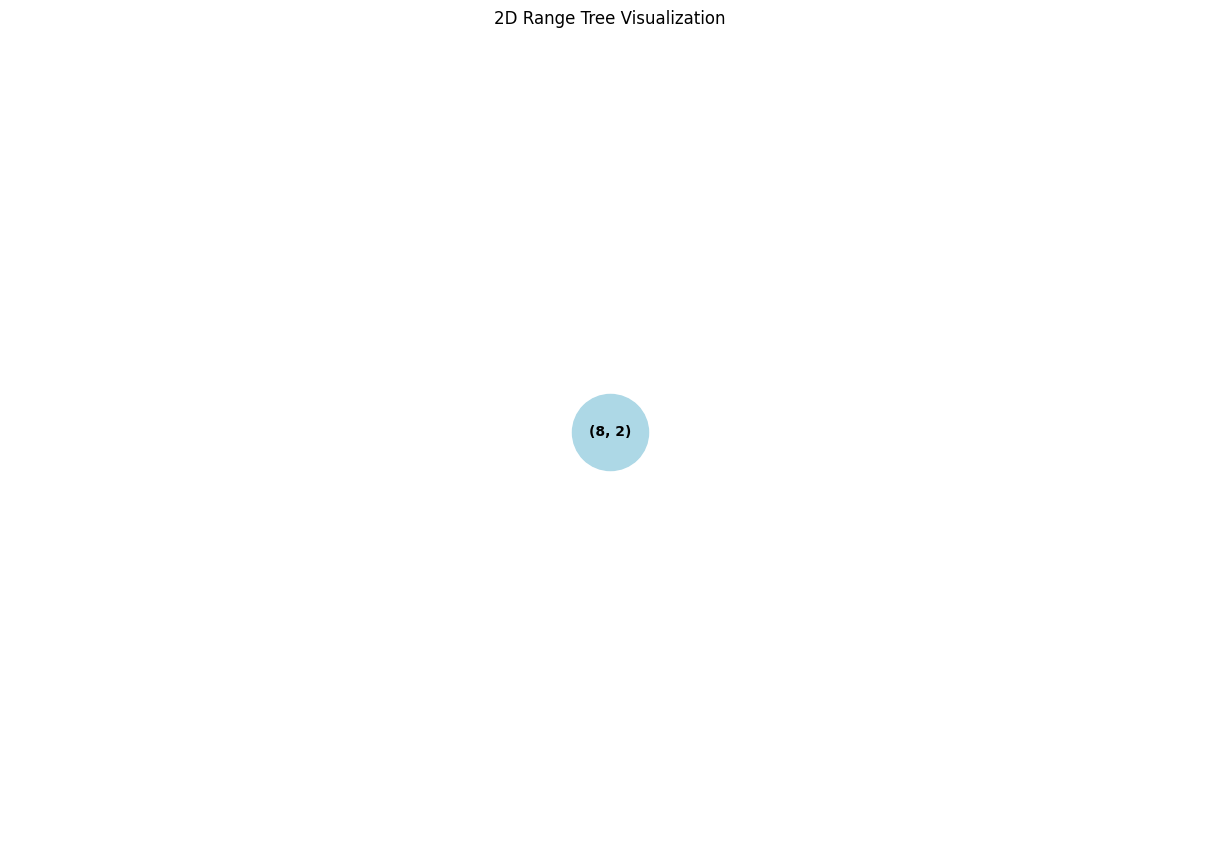

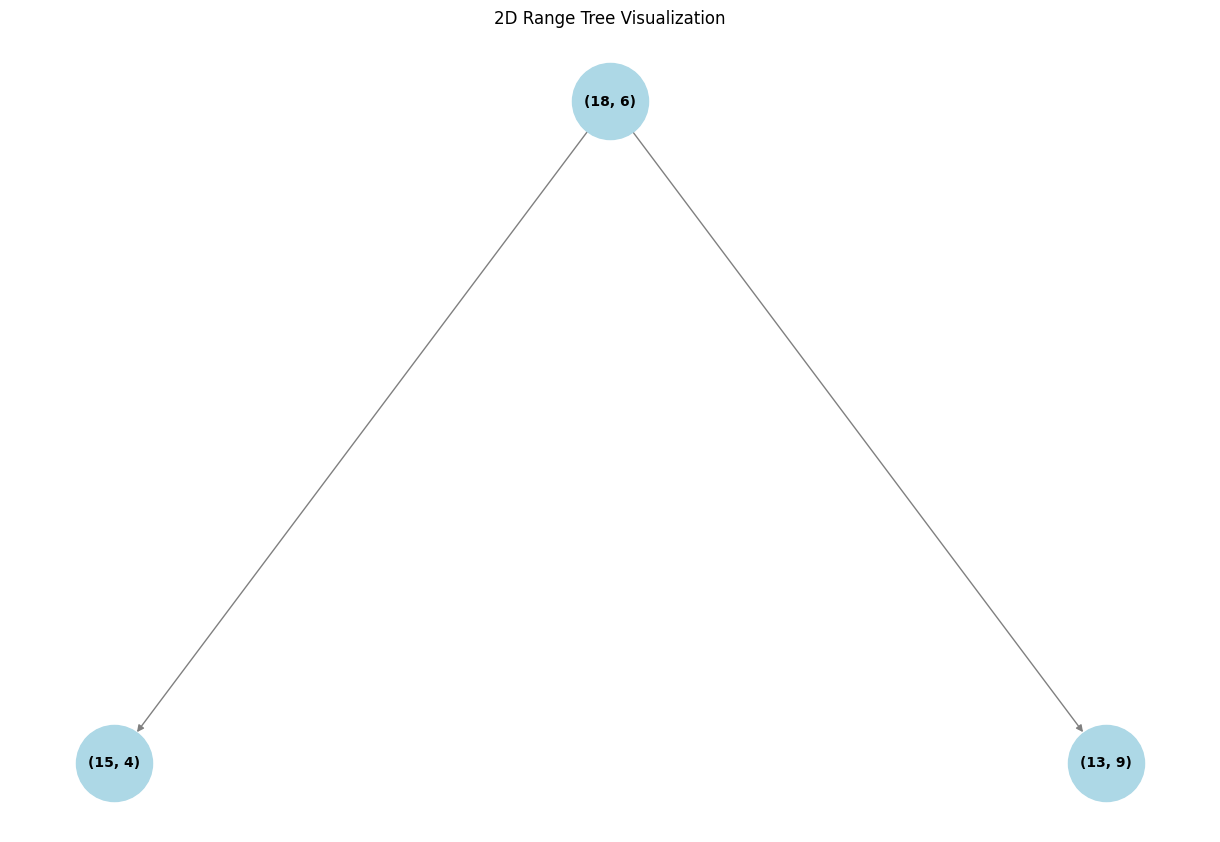

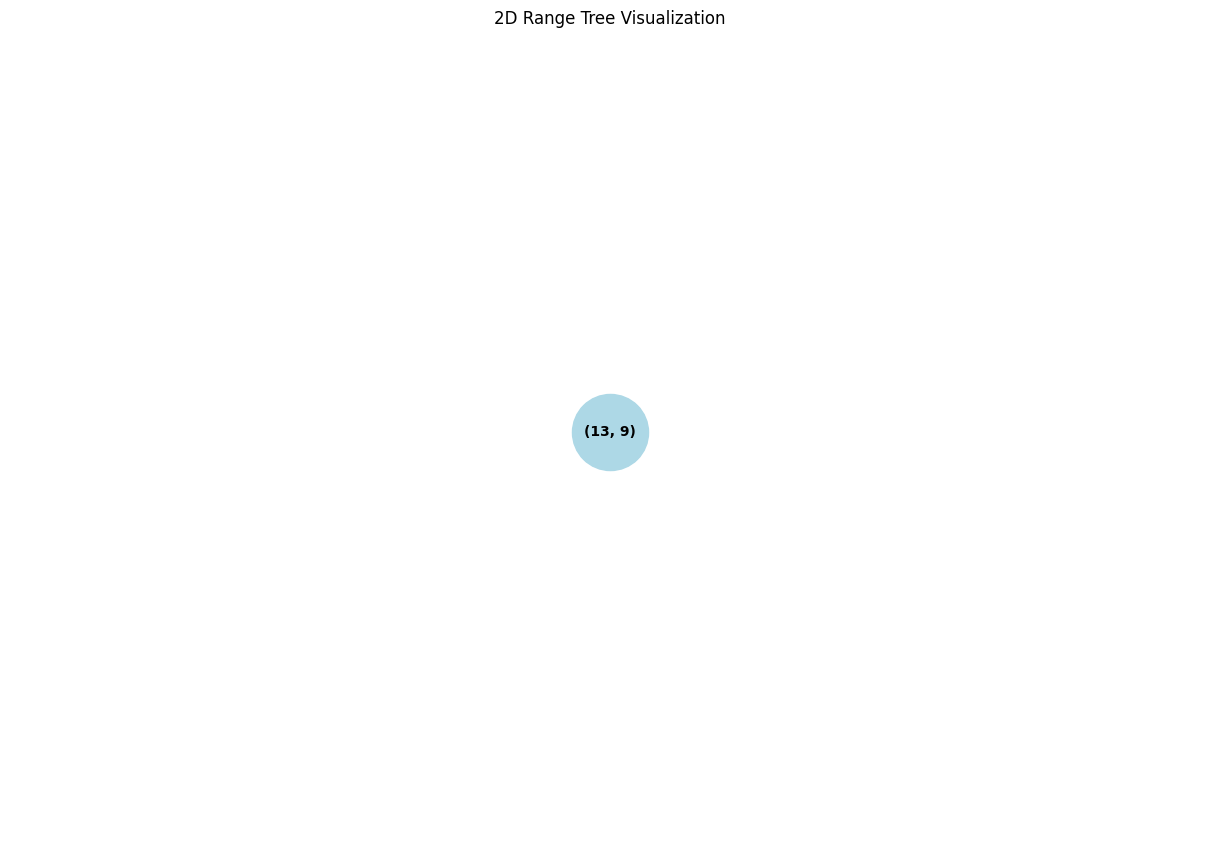

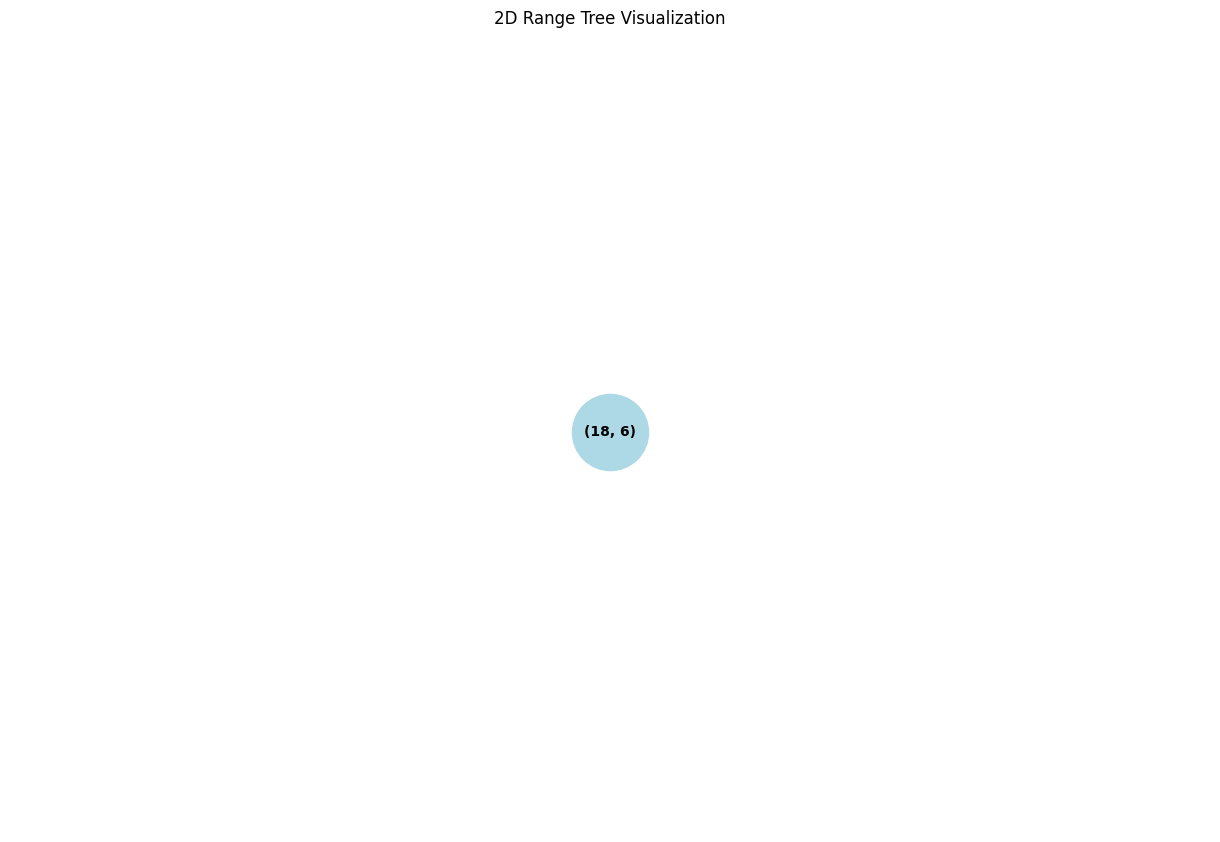

In [47]:
print("-> The secondary range trees.")
draw_tree(range_tree.root.secondary_tree)
def visualizer(node):

  if node.left is not None:
    draw_tree(node.left.secondary_tree)
    visualizer(node.left)
  if node.right is not None:
    draw_tree(node.right.secondary_tree)
    visualizer(node.right)

visualizer(range_tree.root)

In [46]:
print("Range search problem")
points_in_range = range_tree.range_search(range_tree.root, xmin=4, xmax=15, ymin=3, ymax=9)
print(points_in_range)

Range search problem
[(15, 4), (6, 7), (4, 5), (13, 9)]


In [56]:
import random

def generate_unique_integer_points(num_points, x_range, y_range):
    points = set()
    while len(points) < num_points:
        x = random.randint(*x_range)
        y = random.randint(*y_range)
        points.add((x, y))
    return list(points)

# Parameters
num_points = 120
x_range = (0, 100)  # Example range for x-coordinates
y_range = (0, 100)  # Example range for y-coordinates

# Generate unique points
unique_points = generate_unique_integer_points(num_points, x_range, y_range)
print(unique_points[:10])

[(86, 72), (4, 73), (28, 12), (54, 31), (17, 76), (19, 73), (31, 38), (92, 24), (99, 72), (50, 100)]


In [65]:
range_tree = RangeTree2D(unique_points)
points_in_range = range_tree.range_search(range_tree.root, xmin=8, xmax=19, ymin=2, ymax=22)
print(points_in_range)
# draw_tree(range_tree.root)


[(8, 14), (16, 10), (9, 11), (19, 19), (14, 18), (12, 11)]


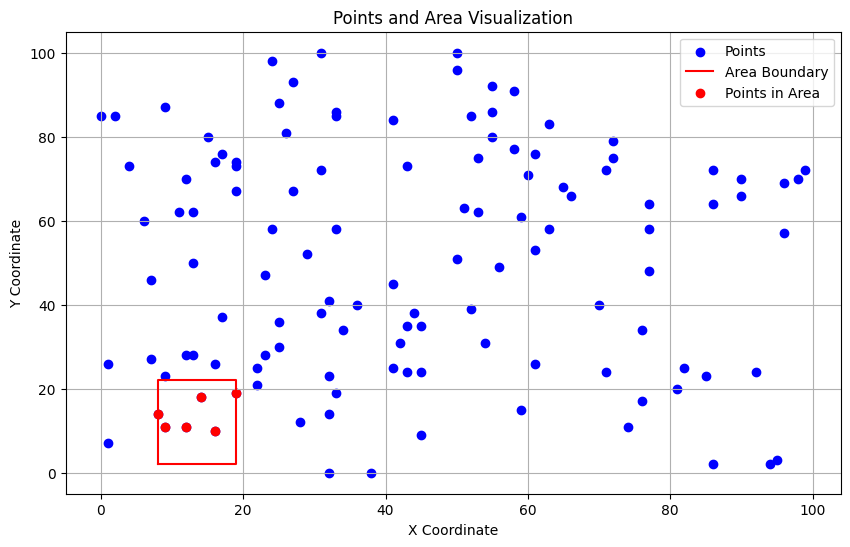

Points within the red area:
(8, 14)
(9, 11)
(12, 11)
(14, 18)
(16, 10)
(19, 19)


In [66]:
import matplotlib.pyplot as plt

def plot_points_with_area(points, area_points):
    # Unzip all points into x and y coordinates
    x_coords, y_coords = zip(*points)

    # Unzip the area points into x and y coordinates
    area_x_coords, area_y_coords = zip(*area_points)

    # Calculate the bounding box of the square
    min_x = min(area_x_coords)
    max_x = max(area_x_coords)
    min_y = min(area_y_coords)
    max_y = max(area_y_coords)

    # Filter points that fall within the area
    points_in_area = [point for point in points if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y]

    # Plot all points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Points')

    # Plot the boundary of the area with a red border
    plt.plot([min_x, max_x, max_x, min_x, min_x],
             [min_y, min_y, max_y, max_y, min_y],
             c='red', label='Area Boundary')

    # Highlight points within the area
    if points_in_area:
        area_x_coords, area_y_coords = zip(*points_in_area)
        plt.scatter(area_x_coords, area_y_coords, c='red', marker='o', label='Points in Area')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Points and Area Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print points that belong to the red area
    print("Points within the red area:")
    for point in points_in_area:
        print(point)

# Example list of unique integer points (replace with your actual points)


# Example list of 4 points that define the area (the corners of the square)
area_points = [(8, 22), (19, 2)]

# Plot points and highlight the area
plot_points_with_area(unique_points, area_points)


- quickhull παει λιγο στραβα
- να συνταξω το 2,3 στο Α θεμα
- θεμα γ τριγωνοποιηση 2 ερωτημα
- συνταξη comments


